In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.9.2


In [41]:
# Creating a zero-filled tensor
row_dim, col_dim = 3, 3
zero_tsr = tf.zeros(shape=[row_dim, col_dim], dtype=tf.float32)
print(zero_tsr)


tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [42]:
# Creating a one-filled tensor
ones_tsr = tf.ones([row_dim, col_dim])
print(ones_tsr)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [43]:
filled_tsr = tf.fill([row_dim, col_dim], 42)
print(filled_tsr)

tf.Tensor(
[[42 42 42]
 [42 42 42]
 [42 42 42]], shape=(3, 3), dtype=int32)


In [44]:
# Creating a tensor out of an existing constant
constant_tsr = tf.constant([1,2,3])
print(constant_tsr)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [45]:
# Initializing TF variables based on the shape of other tensors
zeros_similar = tf.zeros_like(constant_tsr) 
ones_similar = tf.ones_like(constant_tsr)
print(zeros_similar, ones_similar)

tf.Tensor([0 0 0], shape=(3,), dtype=int32) tf.Tensor([1 1 1], shape=(3,), dtype=int32)


In [46]:
# Specifying tensors that contain float defined intervals
linear_tsr = tf.linspace(start=0.0, stop=1.0, num=3)
print(linear_tsr)

tf.Tensor([0.  0.5 1. ], shape=(3,), dtype=float32)


In [47]:
# Randomizing entries of arrays
input_tensor = tf.range(start=0, limit=10, delta=1)
shuffled_output = tf.random.shuffle(input_tensor)
print(shuffled_output)

tf.Tensor([9 4 8 1 0 2 7 3 5 6], shape=(10,), dtype=int32)


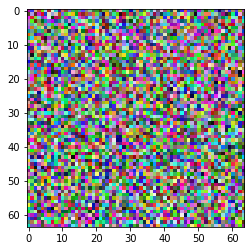

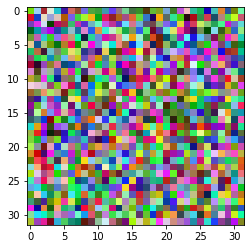

In [48]:
# Randomly cropping images of size (height, width, 3)
height, width = (64, 64)
my_image = tf.random.uniform([height, width, 3], minval=0,
                             maxval=255, dtype=tf.int32)
cropped_image = tf.image.random_crop(my_image, 
                                     [height//2, width//2, 3])

import matplotlib.pyplot as plt
_ = plt.imshow(my_image)
plt.show()
_ = plt.imshow(cropped_image)
plt.show()

In [49]:
x = [[2.]]
m = tf.matmul(x, x)
print("the result is {}".format(m))

the result is [[4.]]


In [50]:
identity_matrix = tf.linalg.diag([1.0, 1.0, 1.0]) 
A = tf.random.truncated_normal([2, 3]) 
B = tf.fill([2,3], 5.0) 
C = tf.random.uniform([3,2]) 
D = tf.convert_to_tensor(np.array([[1., 2., 3.],
                                   [-3., -7., -1.],
                                   [0., 5., -2.]]), 
                         dtype=tf.float32) 
print(identity_matrix)
print(A) 
print(B) 
print(C)


tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 1.1442094  -1.6089787  -1.347222  ]
 [-0.6169336  -1.3743334  -0.19514403]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[5. 5. 5.]
 [5. 5. 5.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.2046014  0.82478166]
 [0.81674874 0.57813525]
 [0.72301936 0.9893687 ]], shape=(3, 2), dtype=float32)


In [51]:
print(tf.multiply(D, identity_matrix))

tf.Tensor(
[[ 1.  0.  0.]
 [-0. -7. -0.]
 [ 0.  0. -2.]], shape=(3, 3), dtype=float32)


In [52]:
print(tf.transpose(C)) 

tf.Tensor(
[[0.2046014  0.81674874 0.72301936]
 [0.82478166 0.57813525 0.9893687 ]], shape=(2, 3), dtype=float32)


In [53]:
print(tf.linalg.det(D))

tf.Tensor(-38.0, shape=(), dtype=float32)


In [54]:
print(tf.linalg.cholesky(identity_matrix))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [55]:
print(tf.math.divide(3,4))

tf.Tensor(0.75, shape=(), dtype=float64)


In [56]:
def pi_tanh(x):
  return tf.tan(3.1416/x)

tf.math.square(4)  


<tf.Tensor: shape=(), dtype=int32, numpy=16>

In [57]:
print(tf.nn.relu([-3., 3., 10.]))

tf.Tensor([ 0.  3. 10.], shape=(3,), dtype=float32)


In [58]:
x_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.Variable(x_vals, dtype=tf.float32)
m_const = tf.constant(3.)
operation = tf.multiply(x_data, m_const)
for result in operation:
    print(result.numpy()) 

3.0
9.0
15.0
21.0
27.0


In [59]:
my_array = np.array([[1., 3., 5., 7., 9.], 
                     [-2., 0., 2., 4., 6.], 
                     [-6., -3., 0., 3., 6.]]) 
x_vals = np.array([my_array, my_array + 1])
x_data = tf.Variable(x_vals, dtype=tf.float32)

In [60]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X
     

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [61]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [62]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [63]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [64]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [65]:
# This will work after specifying the input shape
model.summary()
     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output
     

In [67]:
# Make predictions
y_preds = model.predict(X_test)


1/1 [==============================] - 0s 331ms/step


In [68]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [69]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=tf.squeeze(y_pred))

In [70]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 72ms/step


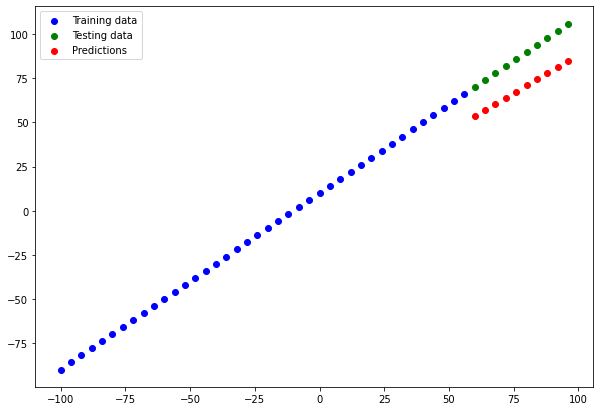

In [71]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)
     

In [72]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [73]:
#Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 58ms/step


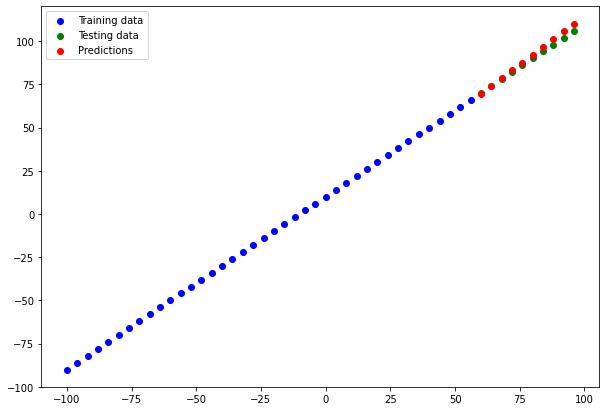

In [74]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [75]:

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

In [76]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

#Loading a model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).



In [77]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


#A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your proble



In [78]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
# Check out the insurance dataset
insurance.head()
          


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [80]:
insurance.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [81]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits
     

In [82]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [83]:

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)

# DOWNLOADING DATASETS

In [84]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

iris = tfds.load('iris', split='train')

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [85]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

birthdata_url = 'https://raw.githubusercontent.com/PacktPublishing/TensorFlow-2-Machine-Learning-Cookbook-Third-Edition/master/birthweight.dat' 
path = tf.keras.utils.get_file(birthdata_url.split('/')[-1], birthdata_url)
def map_line(x):
    return tf.strings.to_number(tf.strings.split(x))
birth_file = (tf.data
              .TextLineDataset(path)
              .skip(1)     # Skip first header line
              .map(map_line)
             )

4554/4554 [==============================] - 0s 0us/step


In [86]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

housing_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
path = tf.keras.utils.get_file(housing_url.split("/")[-1], housing_url)

def map_line(x):
    return tf.strings.to_number(tf.strings.split(x))

housing = (tf.data
           .TextLineDataset(path)
           .map(map_line)
          )

49082/49082 [==============================] - 0s 3us/step


In [87]:
import os
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen, Request
import tensorflow_datasets as tfds
sentence_url = 'https://www.manythings.org/anki/deu-eng.zip'


In [88]:
tf.ones((2, 3, 4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [89]:
tf.random.normal(shape=[3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 ],
       [-2.3880599 , -1.0392479 , -0.5573232 ,  0.539707  ],
       [ 1.6994323 ,  0.28893656, -1.5066116 , -0.26454744]],
      dtype=float32)>

In [94]:
x = tf.range(12, dtype=tf.float32)

In [95]:
X = tf.reshape(x, (3, 4))
X

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

#BROADCASTING

In [121]:
a = tf.reshape(tf.range(3), (3, 1))
b = tf.reshape(tf.range(2), (1, 2))
a, b

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

In [96]:
X_var = tf.Variable(X)
X_var[1,2].assign(9)

<tf.Variable 'UnreadVariable' shape=(3, 4) dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [97]:
X_var = tf.Variable(X)
X_var[:2,:].assign(tf.ones(X_var[:2,:].shape,dtype=tf.float32)* 12)

<tf.Variable 'UnreadVariable' shape=(3, 4) dtype=float32, numpy=
array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [98]:
tf.exp(x)

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([1.0000000e+00, 2.7182817e+00, 7.3890562e+00, 2.0085537e+01,
       5.4598148e+01, 1.4841316e+02, 4.0342877e+02, 1.0966332e+03,
       2.9809580e+03, 8.1030840e+03, 2.2026465e+04, 5.9874141e+04],
      dtype=float32)>

In [100]:
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 3.,  4.,  6., 10.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.,  0.,  2.,  6.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.,  4.,  8., 16.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5, 1. , 2. , 4. ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.,  4., 16., 64.], dtype=float32)>)

In [101]:
X = tf.reshape(tf.range(12,dtype=tf.float32),(3,4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

In [102]:
tf.reduce_sum(X)

<tf.Tensor: shape=(), dtype=float32, numpy=66.0>

In [103]:
a = tf.reshape(tf.range(3),(3,1))
b = tf.reshape(tf.range(2), (1, 2))
a, b

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

In [104]:
Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
Z.assign(X + Y)
print('id(Z):', id(Z))

id(Z): 139985203480368
id(Z): 139985203480368


In [106]:
Z

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 2.,  2.,  6.,  6.],
       [ 5.,  7.,  9., 11.],
       [12., 12., 12., 12.]], dtype=float32)>

In [105]:
@tf.function
def computation(X, Y):
  Z = tf.zeros_like(Y)
  A = X + Y  # Allocations will be reused when no longer needed
  B = A + Y
  C = B + Y
  return C + Y

computation(X, Y)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 8.,  5., 18., 15.],
       [ 8., 13., 18., 23.],
       [24., 21., 18., 15.]], dtype=float32)>

In [107]:
A = X.numpy()


In [120]:
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x,y,x == y,x < y,x > y

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 4., 8.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=bool, numpy=array([False,  True, False, False])>,
 <tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False, False, False])>,
 <tf.Tensor: shape=(4,), dtype=bool, numpy=array([False, False,  True,  True])>)

#The tf.function API is used in TF2.0 to create graphs for eagerly executed code.

There are two ways you can use this.
1. As a decorator: Using @tf.function decorator before your code will create a graph for that piece of code.

https://www.machinelearningplus.com/deep-learning/how-use-tf-function-to-speed-up-python-code-tensorflow/

In [113]:
import tensorflow as tf
import time
from datetime import datetime
import timeit

@tf.function 
def function(x):
  a = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)
  return a+b

In [114]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation="relu")
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))


Eager time: 20.15601071900005
Graph time: 12.116652629999976


#https://stackabuse.com/understanding-tensorflows-tffunction-decorator/

In [118]:
x = tf.random.uniform(shape=[100,100],minval = 1, maxval = -1, dtype=tf.dtypes.float32)
def some_costly_function(x):
  aux = tf.eye(100, dtype=tf.dtypes.float32)
  result = tf.zeros(100, dtype = tf.dtypes.float32)
  for i in range(1,100):
        aux = tf.matmul(x,aux)/i
        result = result + aux
  return result

%timeit some_costly_function(x)

22.9 ms ± 7.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [119]:
@tf.function
def quick_computation(x):
  aux = tf.eye(100, dtype=tf.dtypes.float32)
  result = tf.zeros(100, dtype = tf.dtypes.float32)
  for i in range(1,100):
    aux = tf.matmul(x,aux)/i
    result = result + aux
  return result

%timeit quick_computation(x)

6.69 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#https://www.machinelearningnuggets.com/how-to-load-dataset-in-jax-with-tensorflow/